<a href="https://colab.research.google.com/github/anjot2807/Tumor_size_prediction-linear_regression/blob/main/Tumor_size_prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset Description**


The dataset appears to represent measurements and calculated metrics related to the analysis of tumors, possibly within a medical or biomedical research context. Each row in the dataset corresponds to a specific tumor sample, and the columns represent various characteristics, measurements, or derived metrics associated with those samples. The goal of the dataset may involve understanding factors that influence tumor size or severity, potentially for predictive modeling or diagnostic purposes.


This dataset is likely used for medical research or predictive modeling of tumor characteristics, where understanding the relationships between different variables (such as mass, size, malignancy, and damage) can aid in diagnostics, treatment planning, or understanding the progression of the disease. The tumor_size variable could be the primary target variable for regression models aiming to predict tumor growth based on other factors.

# **Variable Descriptions**

**mass_npea:**
 This variable represents the mass of the tumor measured in some specific units (possibly grams or milligrams). The "npea" suffix could refer to a specific type of mass measurement or a subset of the data collection method.
Units: Likely mass units (e.g., grams, milligrams).

**size_npear:**
 This represents the size of the tumor, potentially measured in millimeters or centimeters. The "npear" suffix might denote a specific calculation or normalization applied to the size measurement.
Units: Likely length units (e.g., millimeters, centimeters).

**malign_ratio:**
The malignancy ratio, which is the proportion of malignant cells or tissue within the tumor. A higher ratio indicates a higher presence of malignant components.
Units: Ratio (unitless, ranging from 0 to 1).

**damage_size:**
This variable could represent the size or extent of the damage caused by the tumor, either in surrounding tissues or as an indicator of the tumor's aggressiveness.
Units: Likely length or area units (e.g., square millimeters).

**exposed_area:**
The exposed area likely refers to the surface area of the tumor that is exposed to external factors, possibly indicating vulnerability or interaction with the environment or treatments.
Units: Area units (e.g., square millimeters).

**std_dev_malign:**
 This is the standard deviation of malignancy-related measurements, indicating the variability in malignancy across different parts of the tumor.
Units: Same as the malignancy measurement units.

**err_malign:**
 The error margin in the malignancy measurement, potentially representing the uncertainty or variability in the diagnosis of malignancy.
Units: Same as the malignancy measurement units.

**malign_penalty:**
 This could represent a calculated penalty score based on the malignancy of the tumor, possibly used in a scoring or predictive model to assess the risk or severity.
Units: Arbitrary units, possibly specific to a model or index.

**damage_ratio:**
The ratio of damage relative to a baseline or expected damage, possibly indicating how much the tumor has disrupted surrounding tissues.
Units: Ratio (unitless, ranging from 0 to 1).

**tumor_size:**
 The overall size of the tumor, likely the target variable for prediction or analysis, representing the tumor's physical dimensions.
Units: Length or volume units (e.g., millimeters, cubic millimeters).

Source of data:

https://www.kaggle.com/datasets/anmolkumar/machine-hack-melanoma-tumor-size-prediction/data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

I aim to predict tumor size using linear regression methods to explore how well these techniques can model the relationship between the features and the target variable.

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [ ]:
df.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9.146000e+03,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9903.052174,3032.827837,0.303083,103.902118,1.372442e+06,146.304239,3992.936256,69.849661,34.461652,7.723348
std,4060.577116,1462.334147,0.062533,55.456862,5.646773e+05,70.512177,1780.672859,55.785332,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,3.878534e+05,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,9.596873e+05,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,1.237057e+06,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,1.693083e+06,182.251500,4664.577500,91.000000,38.806075,13.336000
max,36995.400000,13535.000000,0.525300,346.420000,4.978616e+06,528.890000,91983.700000,340.000000,46.546400,20.999000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [ ]:
print("Number of null in each column:")
print(df.isnull().sum())

Number of null in each column:
mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64


In [ ]:
print("Number of duplicated rows:")
print(df.duplicated().sum())

Number of duplicated rows:
93


In [ ]:
# drop duplicates
df = df.drop_duplicates()

print("Number of duplicated rows after removal:")
print(df.duplicated().sum())

Number of duplicated rows after removal:
0


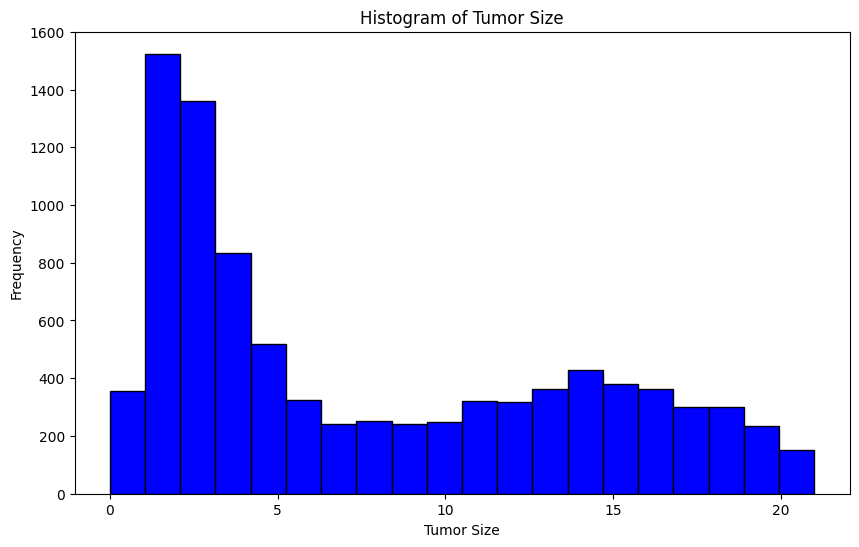

In [ ]:
# histogram 'tumor_size'
plt.figure(figsize=(10, 6))
plt.hist(df['tumor_size'], bins=20, color='blue', edgecolor='black')

# Dodanie tytułu i etykiet osi
plt.title('Histogram of Tumor Size')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')

# Wyświetlenie histogramu
plt.show()

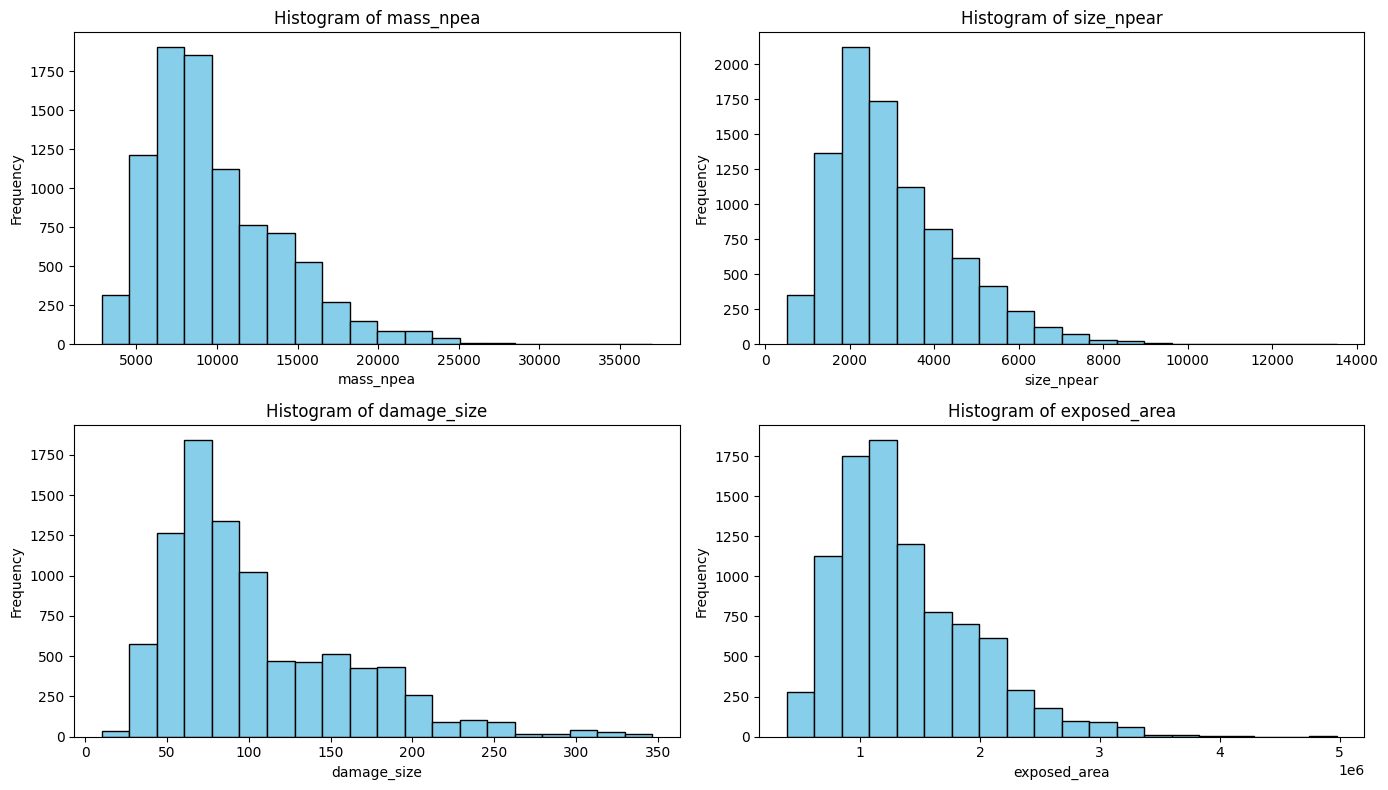

In [ ]:
# Histograms for selected continuous variables
variables = ['mass_npea', 'size_npear', 'damage_size', 'exposed_area']

plt.figure(figsize=(14, 8))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

                mass_npea  size_npear  malign_ratio  damage_size  \
mass_npea        1.000000    0.907669      0.124155     0.930459   
size_npear       0.907669    1.000000      0.499413     0.794150   
malign_ratio     0.124155    0.499413      1.000000     0.029747   
damage_size      0.930459    0.794150      0.029747     1.000000   
exposed_area     0.998166    0.903868      0.120202     0.925012   
std_dev_malign   0.968019    0.908157      0.196998     0.938070   
err_malign       0.615926    0.569265      0.081365     0.534418   
malign_penalty   0.654573    0.592247      0.101500     0.676926   
damage_ratio    -0.900598   -0.791547     -0.069243    -0.891671   
tumor_size      -0.003896    0.164634      0.373094    -0.163599   

                exposed_area  std_dev_malign  err_malign  malign_penalty  \
mass_npea           0.998166        0.968019    0.615926        0.654573   
size_npear          0.903868        0.908157    0.569265        0.592247   
malign_ratio        0.1

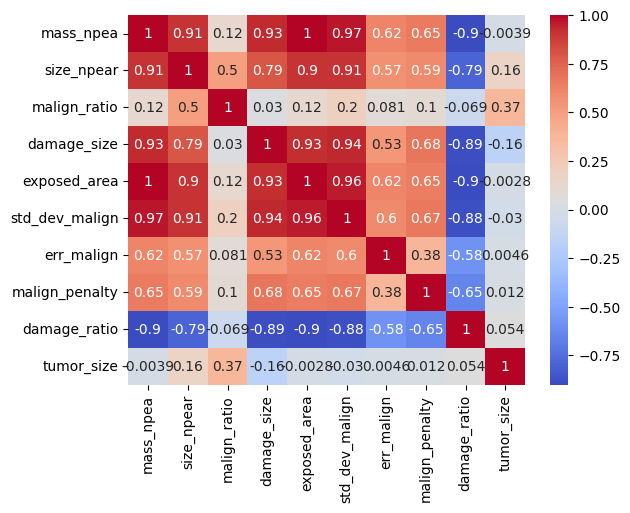

In [ ]:
# correlation matrix
corr_matrix = df.corr()

print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


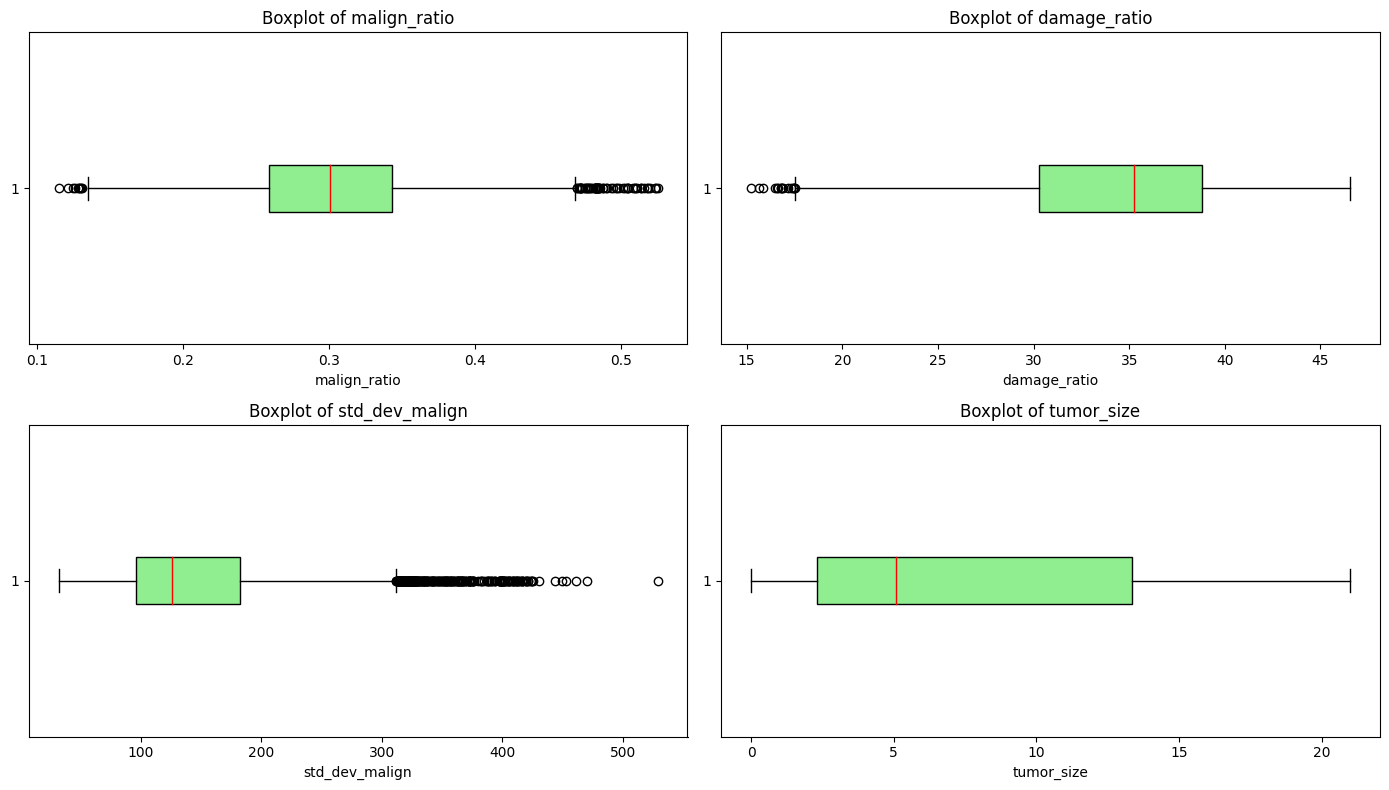

In [ ]:
# Boxplots for selected variables
variables = ['malign_ratio', 'damage_ratio', 'std_dev_malign', 'tumor_size']

plt.figure(figsize=(14, 8))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[var], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='black'),
                medianprops=dict(color='red'))
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

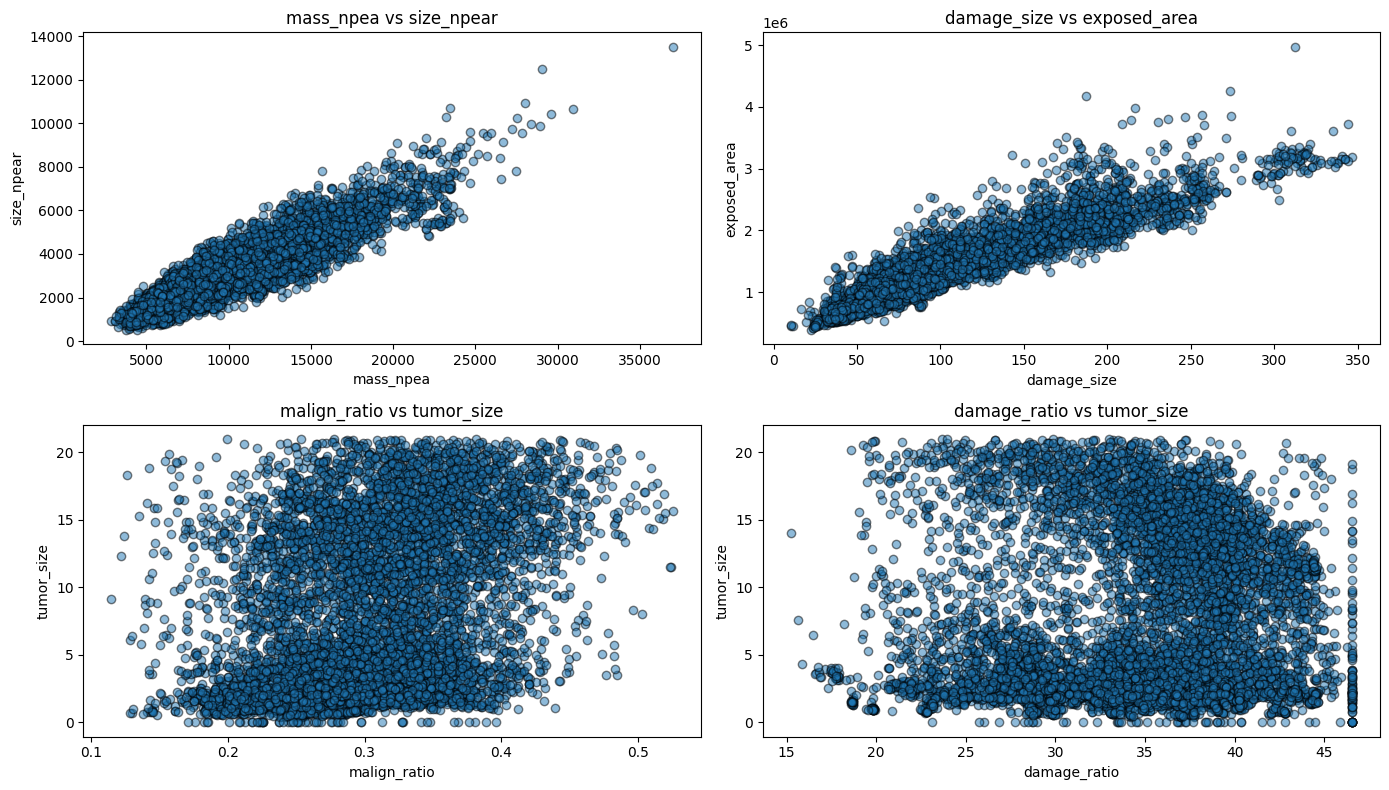

In [ ]:
# Scatter plots for pairs of variables
pairs = [('mass_npea', 'size_npear'), ('damage_size', 'exposed_area'),
         ('malign_ratio', 'tumor_size'), ('damage_ratio', 'tumor_size')]

plt.figure(figsize=(14, 8))
for i, (x_var, y_var) in enumerate(pairs, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[x_var], df[y_var], alpha=0.5, edgecolor='black')
    plt.title(f'{x_var} vs {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()

In [ ]:
df.tumor_size.describe

<bound method NDFrame.describe of 0       14.103
1        2.648
2        1.688
3        3.796
4       18.023
         ...  
9141    13.127
9142    17.091
9143     1.971
9144    17.749
9145    14.103
Name: tumor_size, Length: 9053, dtype: float64>

In [ ]:
# removing outliers
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # flitration of data
    df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_clean


df_clean = remove_outliers_iqr(df)


In [ ]:
# choosing the target
X = df_clean.drop(columns='tumor_size')
y = df_clean['tumor_size']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mean Squared Error: 24.85
R^2 Score: 0.34
Mean Absolute Percentage Error (MAPE): 25092618277141284.00%


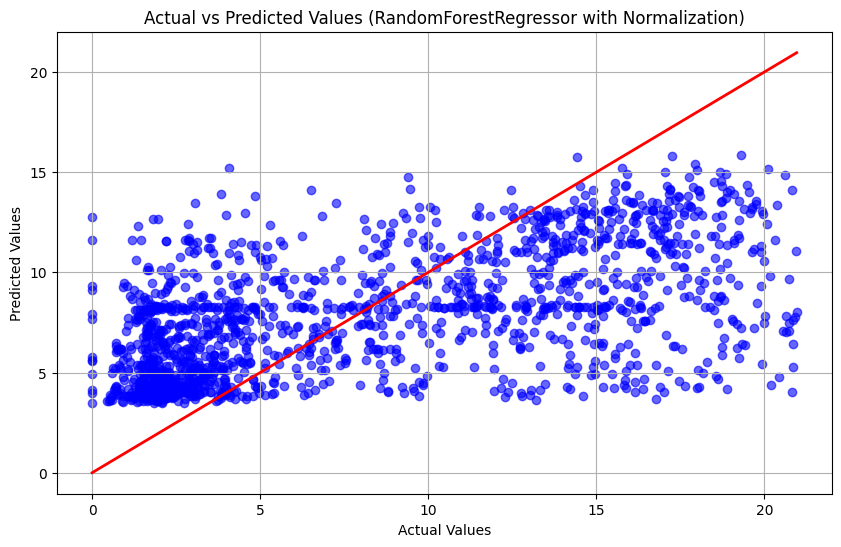

In [ ]:
#  Normalizing the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Only transform test data

#  Creating the RandomForestRegressor model with specified parameters
model_rf = RandomForestRegressor(max_depth=5, min_samples_leaf=4, random_state=42)
model_rf.fit(X_train_scaled, y_train)

#  Making predictions on the test set
y_pred = model_rf.predict(X_test_scaled)

#  Calculating model metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')

#  Visualizing the results with a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Values (RandomForestRegressor with Normalization)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Model - Decision tree regressor

Mean Squared Error: 26.57
R^2 Score: 0.29
Mean Absolute Percentage Error (MAPE): 26588144547573152.00%


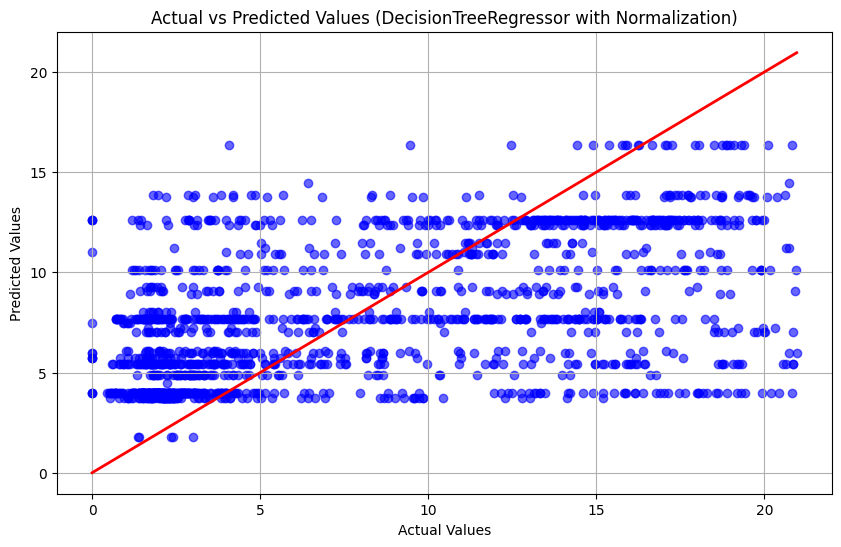

In [ ]:
# Creating the DecisionTreeRegressor model with specified parameters
model_dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=42)
model_dt.fit(X_train_scaled, y_train)

#  Making predictions on the test set
y_pred = model_dt.predict(X_test_scaled)

#  Calculating model metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')

# : Visualizing the results with a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Values (DecisionTreeRegressor with Normalization)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Grid search

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 8}
Mean Squared Error: 23.89
R^2 Score: 0.36
Mean Absolute Percentage Error (MAPE): 25590485938904308.00%


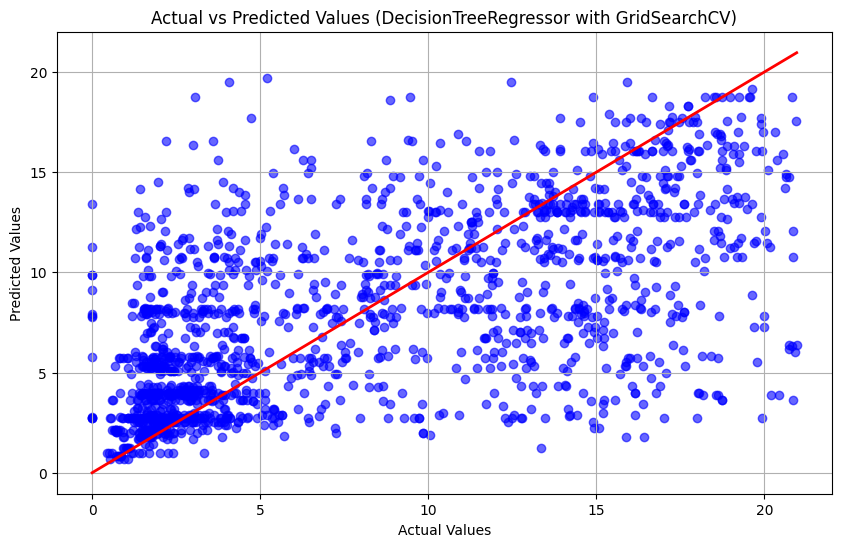

In [ ]:
from sklearn.model_selection import GridSearchCV

# Step 2: Defining the model
model_dt = DecisionTreeRegressor(random_state=42)

# Step 3: Defining the parameter grid for GridSearch
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [2, 4, 6, 8]
}

# Step 4: Setting up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Step 5: Getting the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Step 6: Making predictions with the best model
y_pred = best_model.predict(X_test_scaled)

# Step 7: Calculating model metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')

# Step 8: Visualizing the results with a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Values (DecisionTreeRegressor with GridSearchCV)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

**Gradientboosing regressor**

Gradient Boosting - Mean Squared Error: 21.71
Gradient Boosting - R^2 Score: 0.42
Gradient Boosting - Mean Absolute Percentage Error (MAPE): 23104639670833492.00%


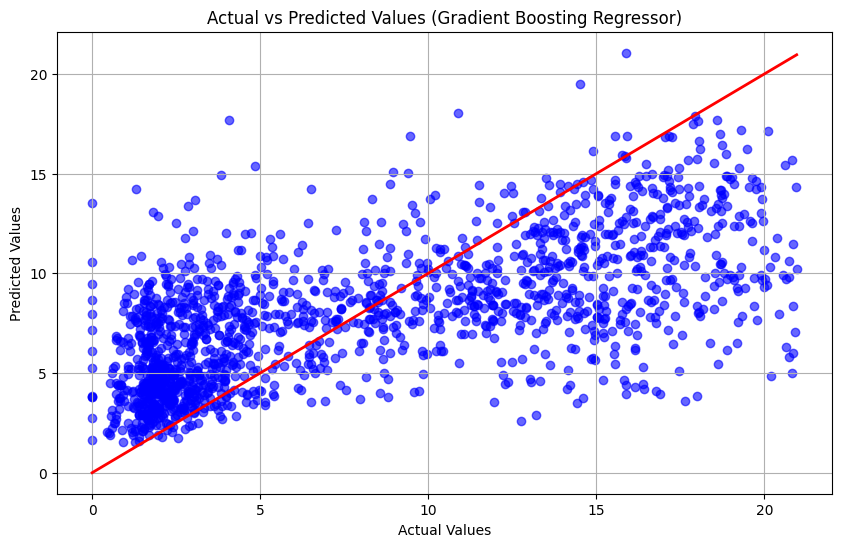

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the GradientBoostingRegressor model
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = model_gb.predict(X_test_scaled)

# Evaluate model performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)

print(f'Gradient Boosting - Mean Squared Error: {mse_gb:.2f}')
print(f'Gradient Boosting - R^2 Score: {r2_gb:.2f}')
print(f'Gradient Boosting - Mean Absolute Percentage Error (MAPE): {mape_gb:.2%}')

# Plot Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Values (Gradient Boosting Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

XGBoost

XGBoost - Mean Squared Error: 17.64
XGBoost - R^2 Score: 0.53
XGBoost - Mean Absolute Percentage Error (MAPE): 19543227566958912.00%


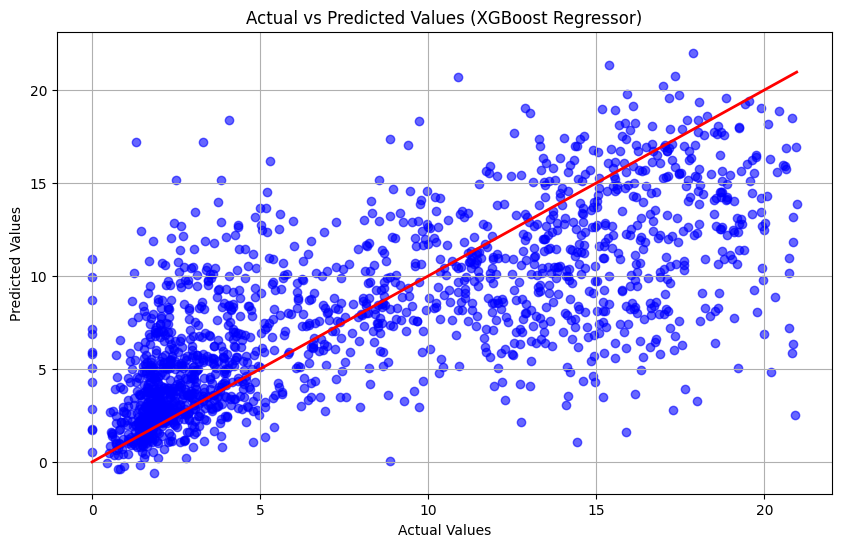

In [ ]:
from xgboost import XGBRegressor
# Create and fit the XGBRegressor model
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Evaluate model performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f'XGBoost - Mean Squared Error: {mse_xgb:.2f}')
print(f'XGBoost - R^2 Score: {r2_xgb:.2f}')
print(f'XGBoost - Mean Absolute Percentage Error (MAPE): {mape_xgb:.2%}')

# Plot Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Values (XGBoost Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

KNN

KNN - Mean Squared Error: 19.25
KNN - R^2 Score: 0.49
KNN - Mean Absolute Percentage Error (MAPE): 25215457554440428.00%


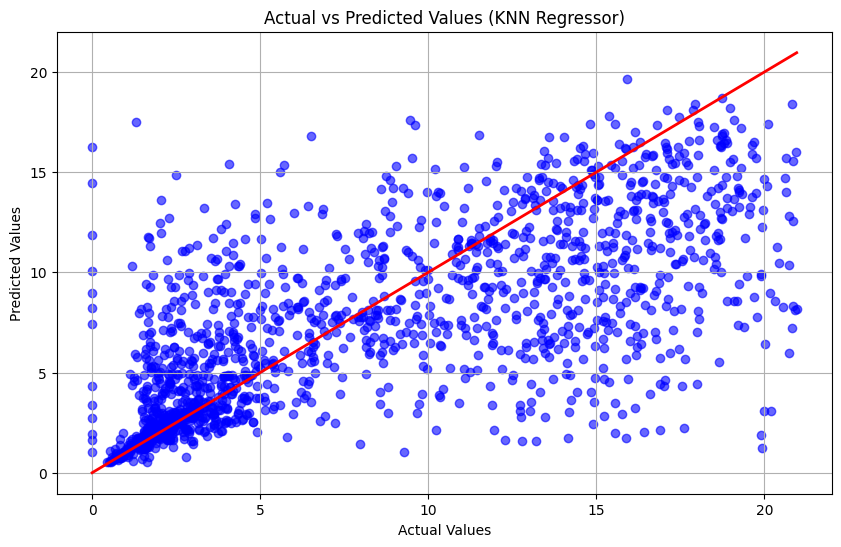

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create and fit the KNeighborsRegressor model
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluate model performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)

print(f'KNN - Mean Squared Error: {mse_knn:.2f}')
print(f'KNN - R^2 Score: {r2_knn:.2f}')
print(f'KNN - Mean Absolute Percentage Error (MAPE): {mape_knn:.2%}')

# Plot Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Values (KNN Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

The dataset I worked with appears to be more suited for classification tasks, rather than regression. Despite my efforts and attempts to apply linear regression to predict the tumor size, the results were unsatisfactory. This suggests that the relationships between the features and the target variable don't lend themselves well to a regression approach.

As the saying goes, "Garbage in, garbage out," meaning that no matter how well we tune a regression model, if the data isn't appropriate for this type of analysis, we won’t achieve meaningful results. In this case, the nature of the dataset indicates it’s better suited for classification models, where binary or categorical outcomes can better capture the underlying patterns, rather than trying to predict continuous values.

All of this work was conducted for training purposes. My goal was to explore the applicability of linear regression for predicting tumor size within this dataset. However, despite various efforts, it became clear that this dataset is more suitable for classification tasks, and achieving good results with regression is unlikely. This was purely an exercise in experimentation and learning.